## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


##### Change root directory

In [ ]:
%cd /content/drive/MyDrive/DLprojects

/content/drive/MyDrive/DLprojects


### Clone Object Detection Model

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 102123, done.
remote: Counting objects: 100% (281/281), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 102123 (delta 181), reused 138 (delta 129), pack-reused 101842 (from 2)
Receiving objects: 100% (102123/102123), 629.39 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (72774/72774), done.
Updating files: 100% (3923/3923), done.


### Download object detection model(Weights)




In [ ]:
# !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz

--2025-06-27 10:06:57--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.145.207, 74.125.128.207, 74.125.143.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.145.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51839363 (49M) [application/x-tar]
Saving to: ‘efficientdet_d1_coco17_tpu-32.tar.gz’

efficientdet_d1_coc 100%[===================>]  49.44M  26.5MB/s    in 1.9s    

2025-06-27 10:06:59 (26.5 MB/s) - ‘efficientdet_d1_coco17_tpu-32.tar.gz’ saved [51839363/51839363]



In [ ]:
# Extract model weights
!tar -xf /content/drive/MyDrive/DLprojects/efficientdet_d1_coco17_tpu-32.tar.gz -C efficientdet/

### Install packges

In [ ]:
!pip install protobuf==3.20.3

In [ ]:
%cd /content/drive/MyDrive/DLprojects/models/research

/content/drive/MyDrive/DLprojects/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

### Inference SSD Model

In [ ]:
import os
import numpy as np
import cv2
import pathlib
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import tensorflow as tf

In [ ]:
#Preparing the image for the model
def load_data(address):
    img = cv2.imread(address)
    r_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #convert to batch:
    r_img = np.expand_dims(r_img, axis=0)
    #convert to tensor:
    r_img = tf.convert_to_tensor(r_img)
    return img, r_img


#Load the previously downloaded and extracted SSD MobileNet V2 model.
def load_model():
    model_dir = r"/content/drive/MyDrive/DLprojects/efficientdet/efficientdet_d1_coco17_tpu-32/saved_model"
    detection_model = tf.saved_model.load(str(model_dir))
    return detection_model


def inference(img, model):
  output_dict = model(img)
  num_detections = int(output_dict.pop("num_detections"))
  output_dict = {key:value[0, :num_detections].numpy() for key, value in output_dict.items()}
  output_dict["detection_classes"] = np.array(output_dict["detection_classes"]).astype(np.int64)
  return output_dict


def visualize(output_dict, img):
  from google.colab.patches import cv2_imshow
  path_to_labels = r"/content/drive/MyDrive/DLprojects/models/research/object_detection/data/mscoco_label_map.pbtxt"
  category_index = label_map_util.create_category_index_from_labelmap(path_to_labels, use_display_name=True)
  vis_util.visualize_boxes_and_labels_on_image_array(img,
                                                     output_dict["detection_boxes"],
                                                     output_dict["detection_classes"],
                                                     output_dict["detection_scores"],
                                                     category_index,
                                                     use_normalized_coordinates=True)
  cv2_imshow(img)

detection_model = load_model()

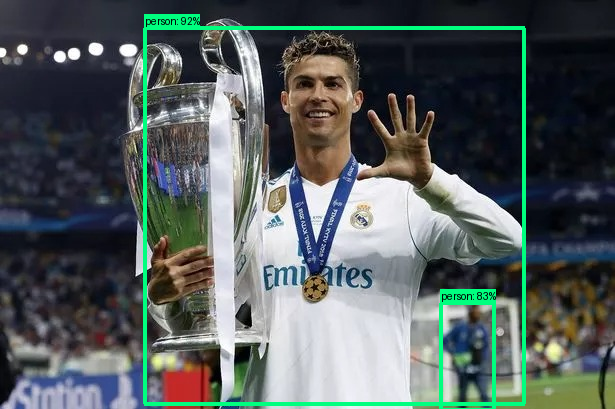

In [ ]:
img, r_img = load_data("/content/drive/MyDrive/DLprojects/SSD/Cristiano.jpg")

output_dict = inference(r_img, detection_model)

visualize(output_dict, img)